<a href="https://colab.research.google.com/github/Aleamarals/Construindo_um_modelo_de_regressao_para_marketing/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [ ]:
# Dataset
mkt = pd.read_csv('/content/MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## Descrição das colunas



1. Youtube: está coluna referece aos investimentos realizados na plataforma Youtube, os dados dela estão no formato float64 e não foi encontrado dados nulos nessa coluna.
2. Facebook: está coluna referece aos investimentos realizados na plataforma Facebook, os dados dela estão no formato float64 e não foi encontrado dados nulos nessa coluna.
3. Newspaper: está coluna referece aos investimentos realizados na plataforma Newspaper, os dados dela estão no formato float64 e não foi encontrado dados nulos nessa coluna.
4. Sale: está coluna referece ao retorno das vendas, os dados dela estão no formato float64 e não foi encontrado dados nulos nessa coluna.

### Coluna acrescentada

5. Invested: está coluna foi acrescentada e referesse ao total dos investimentos, no caso ela é a soma das colunas Youtube, Facebook e Newspaper.





In [ ]:
# Total das colunas de investimentos
total_youtube = mkt['youtube'].sum()
print(f'Investimento total no youtube: R$ {total_youtube:.2f}')
total_facebook = mkt['facebook'].sum()
print(f'Investimento total no facebook: R$ {total_facebook:.2f}')
total_newspaper = mkt['newspaper'].sum()
print(f'Investimento total no newspaper: R$ {total_newspaper:.2f}')
total_investido = sum([total_youtube, total_facebook, total_newspaper])
print(' ')
print(f'Valor total investido: R$ {total_investido:.2f}')

Investimento total no youtube: R$ 30441.60
Investimento total no facebook: R$ 4731.84
Investimento total no newspaper: R$ 6026.04
 
Valor total investido: R$ 41199.48


In [ ]:
# Total da coluna de vendas.
total_sales = mkt['sales'].sum()
print(f'Valor total das vendas: R$ {total_sales:.2f}')

Valor total das vendas: R$ 2893.80


In [ ]:
# Dataset com a coluna investido acrescentado
# A coluna invested é a soma das coluna youtube, facebook e newspaper
mkt['invested'] = mkt[['youtube', 'facebook', 'newspaper']].sum(axis=1)
mkt.head()

,youtube,facebook,newspaper,sales,invested
0,84.72,19.20,48.96,12.60,152.88
1,351.48,33.96,51.84,25.68,437.28
2,135.48,20.88,46.32,14.28,202.68
3,116.64,1.80,36.00,11.52,154.44
4,318.72,24.00,0.36,20.88,343.08


In [ ]:
mkt.describe()

,youtube,facebook,newspaper,sales,invested
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632
std,102.449597,17.913532,24.902918,6.314608,112.167551
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.080000,11.700000,13.740000,12.540000,146.820000
50%,179.760000,26.760000,31.080000,15.480000,248.400000
75%,262.980000,43.680000,50.880000,20.820000,337.740000
max,355.680000,59.520000,121.080000,32.400000,520.320000


In [ ]:
sum_mkt_youtube = mkt["youtube"].sum()
sum_mkt_facebook = mkt["facebook"].sum()
sum_mkt_newspaper = mkt["newspaper"].sum()
sum_mkt_sales = mkt["sales"].sum()

sum_mkt = [sum_mkt_youtube, sum_mkt_facebook, sum_mkt_newspaper, sum_mkt_sales]
sum_mkt

[30441.6, 4731.84, 6026.04, 2893.7999999999993]

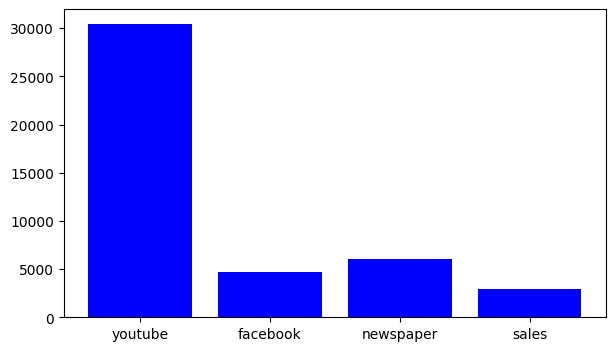

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.bar(["youtube", "facebook", "newspaper", "sales"], sum_mkt, color = "blue")
plt.show()

<Axes: >

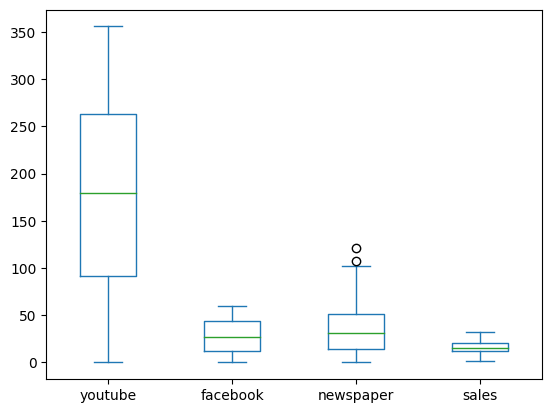

In [ ]:
mkt[['youtube', 'facebook', 'newspaper', 'sales']].plot.box()

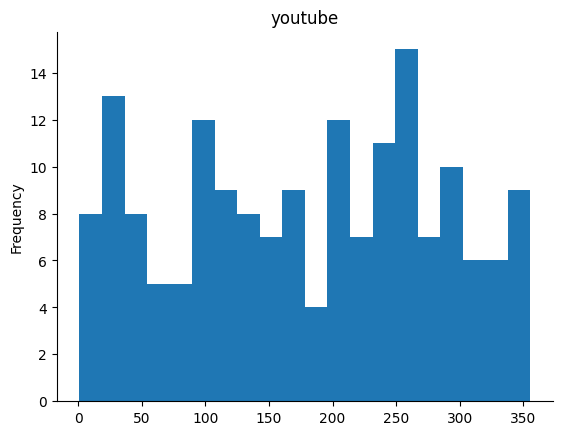

In [ ]:
mkt['youtube'].plot(kind='hist', bins=20, title='youtube')
plt.gca().spines[['top', 'right',]].set_visible(False)

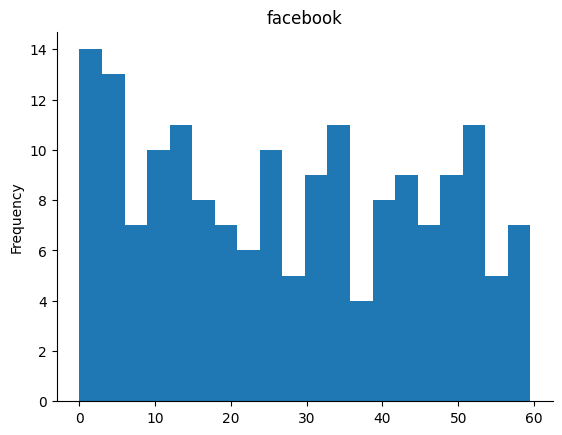

In [ ]:
mkt['facebook'].plot(kind='hist', bins=20, title='facebook')
plt.gca().spines[['top', 'right',]].set_visible(False)

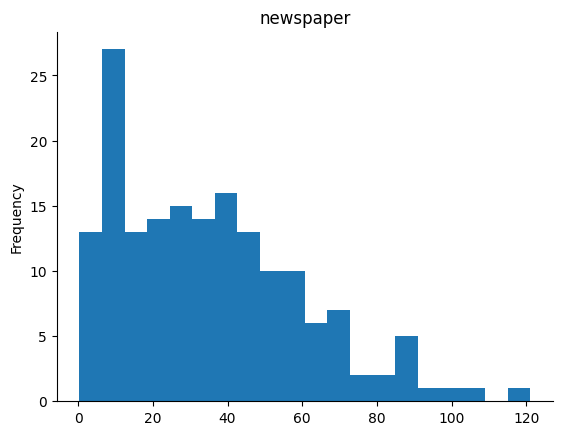

In [ ]:
mkt['newspaper'].plot(kind='hist', bins=20, title='newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

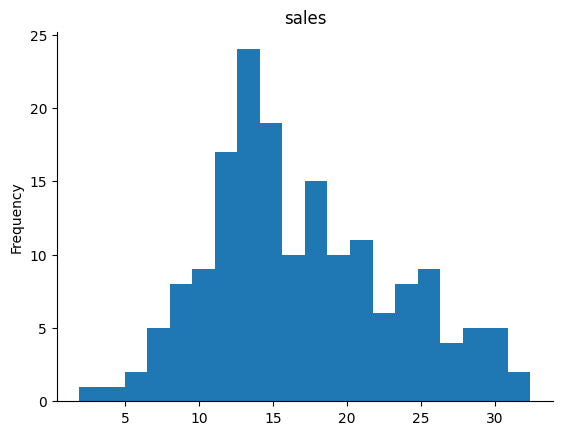

In [ ]:
mkt['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

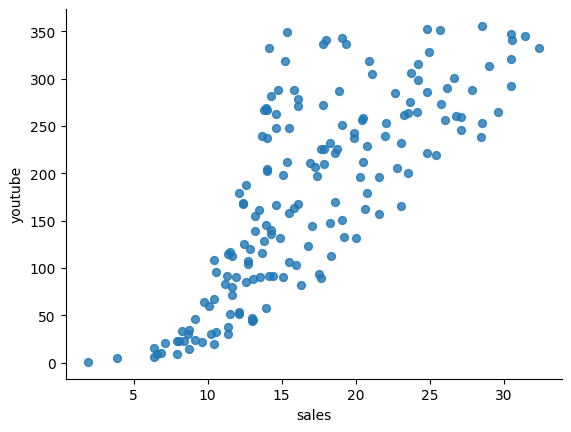

In [ ]:
# Youtube x Sales
mkt.plot(kind='scatter', x='sales', y='youtube', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

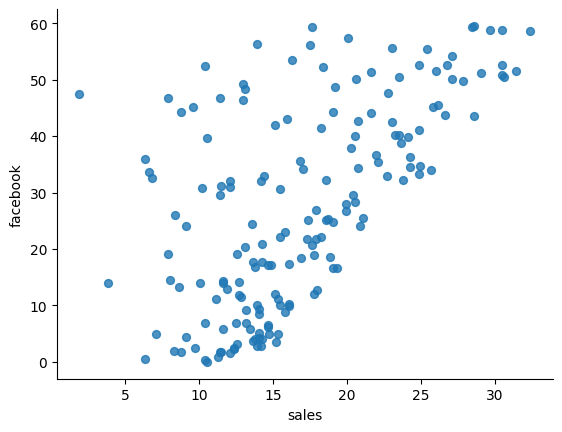

In [ ]:
# Facebook X Sales
mkt.plot(kind='scatter', x='sales', y='facebook', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

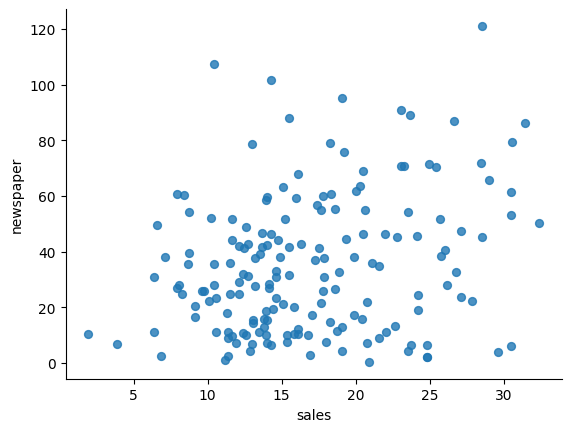

In [ ]:
# Newspaper X Sales
mkt.plot(kind='scatter', x='sales', y='newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

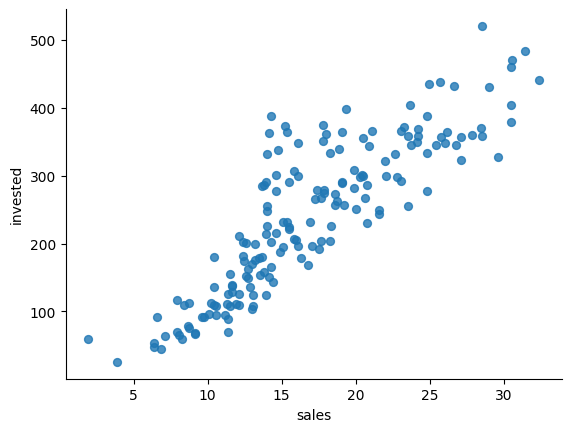

In [ ]:
# Invested X Sales
mkt.plot(kind='scatter', x='sales', y='invested', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

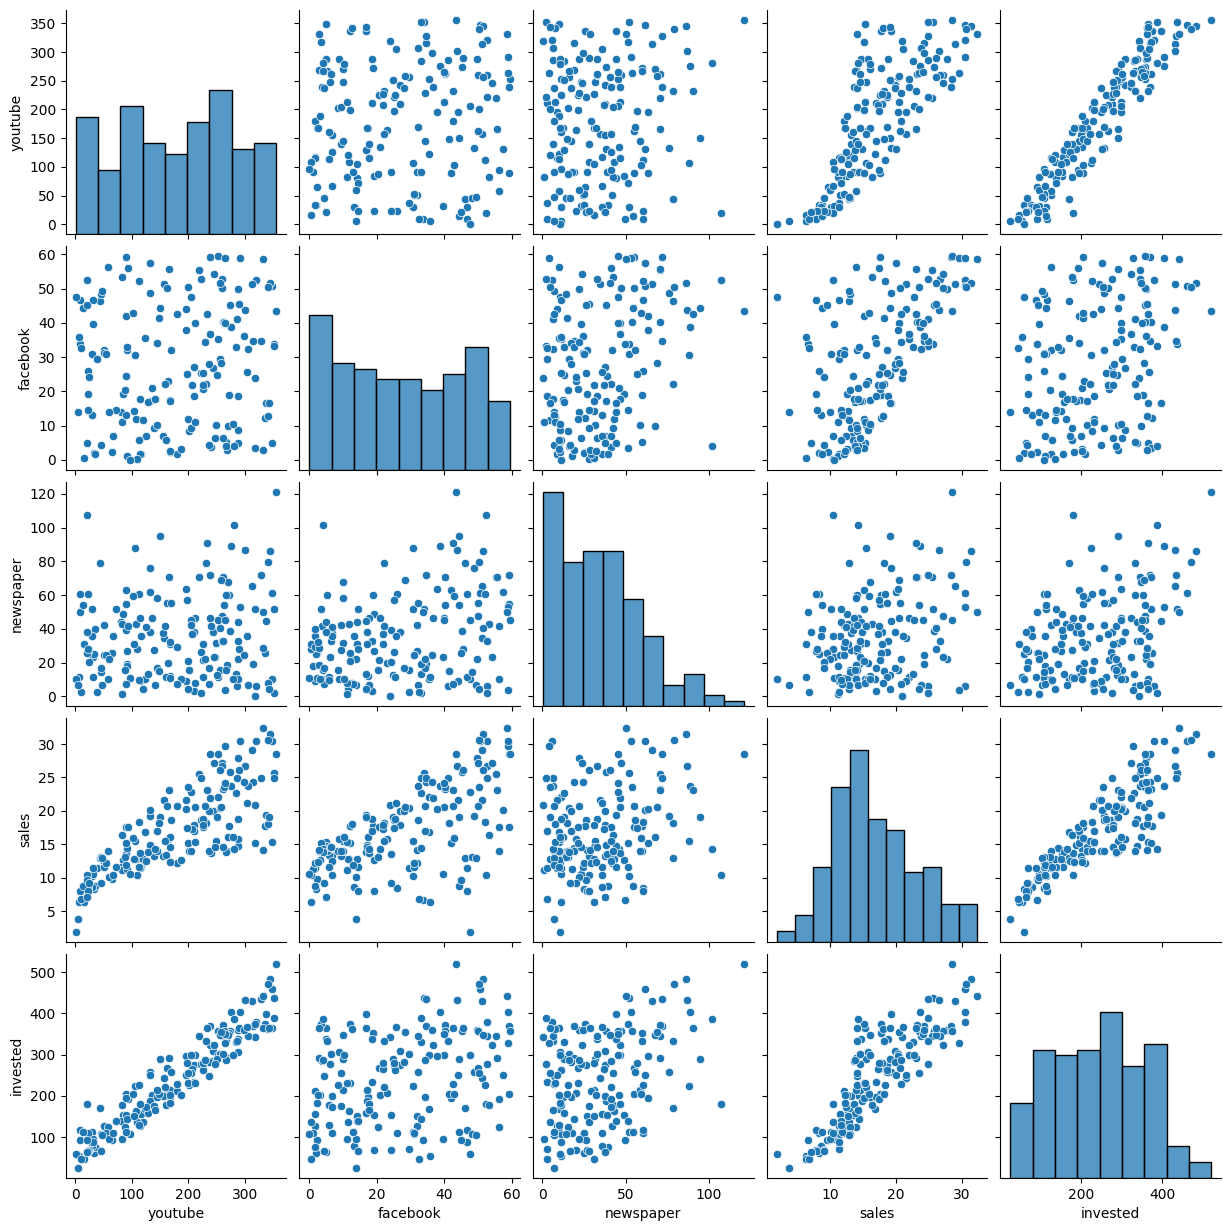

In [ ]:
df_g1 = sns.pairplot(mkt);

In [ ]:
# Dataset somente com as colunas "Sales e Invested"
mkt_investido = mkt.drop(['youtube', 'facebook', 'newspaper'], axis=1)
mkt_investido.head()

,sales,invested
0,12.60,152.88
1,25.68,437.28
2,14.28,202.68
3,11.52,154.44
4,20.88,343.08


<Axes: >

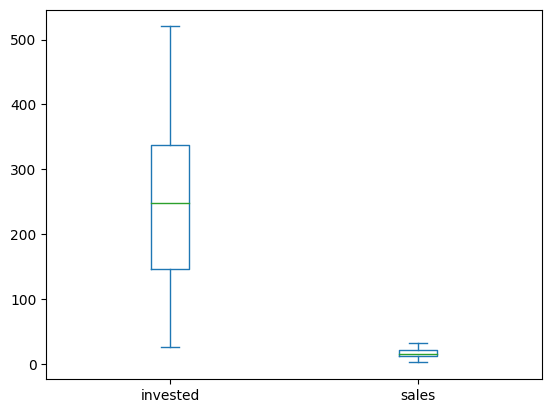

In [ ]:
mkt_investido[['invested', 'sales']].plot.box()

In [ ]:
# Dataset somente com as colunas "Sales e Youtube"
mkt_youtube = mkt.drop(['invested', 'facebook', 'newspaper'], axis=1)
mkt_youtube.head()

,youtube,sales
0,84.72,12.60
1,351.48,25.68
2,135.48,14.28
3,116.64,11.52
4,318.72,20.88


##Definição de dados para predição

Conforme analise realizada nos dados, foi identificado que os investimentos na plataforma Youtube tem os maiores retornos, baseado nessa analise foi determinado que o modelo de predição das vendas será sobre os valores investidos nesta plataforma.  

In [ ]:
X = mkt_youtube['youtube']
y = mkt_youtube['sales']

#MODELING TECHNIQUES

   Regressão Linear Sklearn
   





#TEST DESING

##Dataset split:

Separação de Train/Test dataset padrão com 60% de massa de teste via metodo SKLEARN

##Metrica de avalição do modelo:

R2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=8)

In [ ]:
reg_linear = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)

In [ ]:
yLinear = reg_linear.predict(X_test.values.reshape(-1,1))

In [ ]:
investimento_linear = r2_score(y_test, yLinear)

In [ ]:
print(f'R2 Linear: {investimento_linear}')

R2 Linear: 0.5993832083174555


In [ ]:
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
investimento_linear = r2_score(y_true, y_pred)
print(f'R2 Linear: {investimento_linear}')

R2 Linear: 1.0


In [ ]:
novo_investimento = np.array([[1000]])

In [ ]:
venda_prevista = reg_linear.predict(novo_investimento)

In [ ]:
print(f"Venda prevista para investimento no youttube de R$ {novo_investimento[0][0]:.2f}: R$ {venda_prevista[0]:.2f}")

Venda prevista para investimento no youttube de R$ 1000.00: R$ 54.91
